In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [2]:
data = pd.read_excel("D:/Topmentor_Python_Class/Historical_Heart_Attack.xlsx", sheet_name = 'heart')
desc = pd.read_excel("D:/Topmentor_Python_Class/Historical_Heart_Attack.xlsx", sheet_name = 'Data Dict')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
desc

,Columns,Descriptions
0,Age,Age of the patient
1,Sex,Sex of the patient
2,exang,exercise induced angina (1 = yes; 0 = no)
3,ca,number of major vessels (0-3)
4,cp,Chest Pain type chest pain type
5,Value 1,typical angina
6,Value 2,atypical angina
7,Value 3,non-anginal pain
8,Value 4,asymptomatic
9,trtbps,resting blood pressure (in mm Hg)


In [5]:
data.info()
#All the coulumns are numerical driven data, but most of it are categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Cleaning, Data Pre-Processing, Data Wrangling

In [7]:
#checking for duplicate values
duplicate_rows = data[data.duplicated()]
print('Number of Duplicate Rows: ', duplicate_rows.shape)

Number of Duplicate Rows:  (1, 14)


In [8]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
#Removing th Duplicate Row
data1 = data.drop_duplicates()

In [10]:
data.shape, data1.shape

((303, 14), (302, 14))

In [11]:
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#Checking of Null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

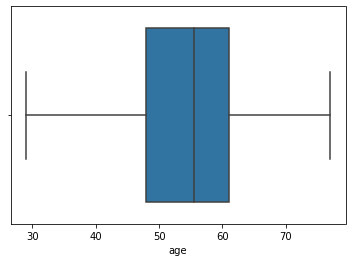

In [13]:
# Detecting of Outliers in the dataset
sns.boxplot(data1['age'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp'>

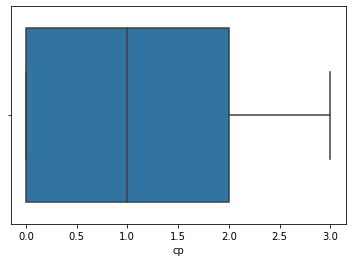

In [14]:
sns.boxplot(data1['cp'])
#Chest pain has no outliers

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trtbps'>

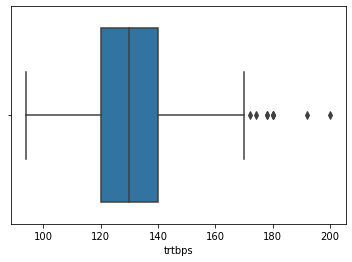

In [15]:
sns.boxplot(data1['trtbps']) # There  are some ouliers in resting blood pressure data
#we have to impute this outlier

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalachh'>

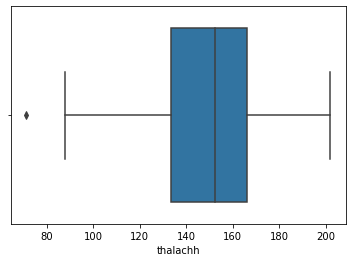

In [16]:
sns.boxplot(data1['thalachh'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

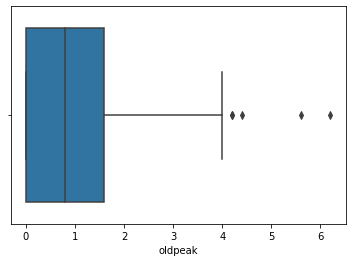

In [17]:
sns.boxplot(data1['oldpeak'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

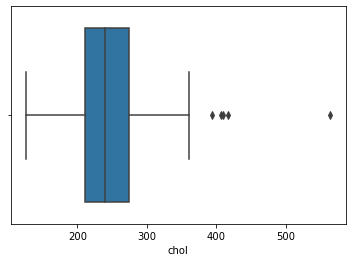

In [18]:
sns.boxplot(data1['chol'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='caa'>

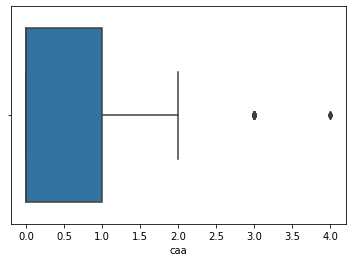

In [19]:
sns.boxplot(data1['caa'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slp'>

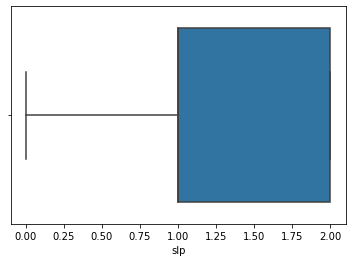

In [20]:
sns.boxplot(data1['slp'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg'>

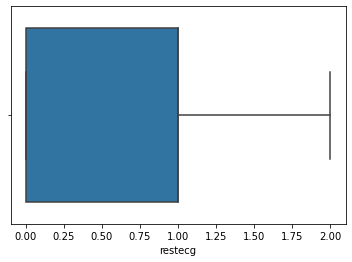

In [21]:
sns.boxplot(data1['restecg'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thall'>

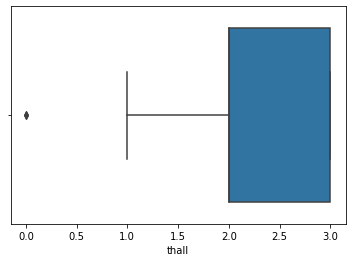

In [22]:
sns.boxplot(data1['thall'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exng'>

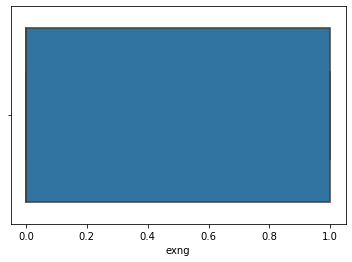

In [23]:
sns.boxplot(data1['exng'])

C:\Users\amant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs'>

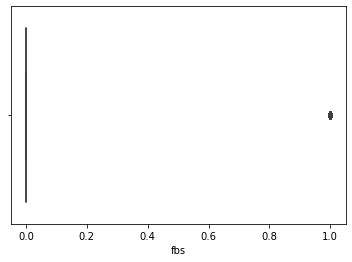

In [24]:
sns.boxplot(data1['fbs'])

Outliers - trtbps,chol,thalachh,oldpeak,caa,thall in the parameters

In [25]:
## IQR- Interquartile Range
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)

In [26]:
IQR = Q3 - Q1
IQR

age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64

### Feature Selection

In [27]:
### Removing ouliers using ouliers
data2 = data1[~((data1<(Q1 - 1.5*IQR))| (data1>(Q3 + 1.5*IQR))).any(axis=1)]
data1.shape, data2.shape

((302, 14), (228, 14))

In [28]:
data2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


<AxesSubplot:>

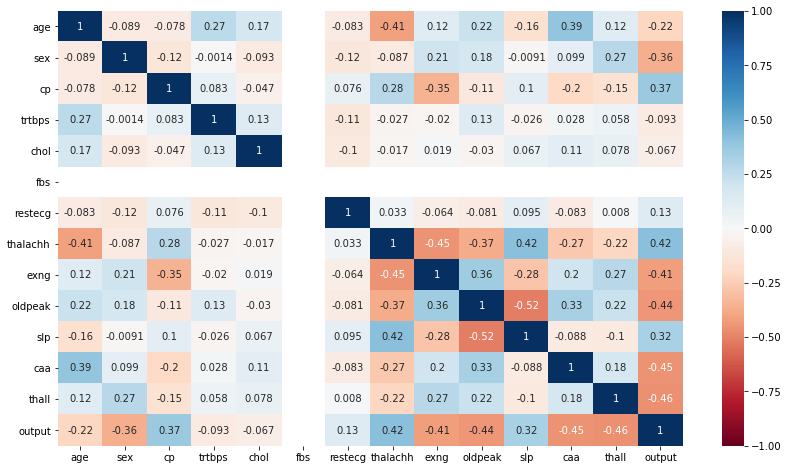

In [29]:
# Certain Features which are important in predicting heart attack
plt.figure(figsize = (14,8))
pearson_corr = data2.corr()
sns.heatmap(pearson_corr, vmax =1, vmin =-1, annot = True, cmap = 'RdBu')

In [30]:
def confusion_matrix_plot(X_train, X_test, y_train, y_test, Classifier, y_pred, Classifier_name):
    fig,ax = plt.subplots(figsize = (4,3))
    plot_confusion_matrix(Classifier, X_test, y_test, cmap = plt.cm.Blues, normalize = None, ax =ax)
    ax.set_title(f'{Classifier_name}- Confusion Matrix')
    plt.show()

In [31]:
pearson_corr['output']

age        -0.215120
sex        -0.363483
cp          0.371115
trtbps     -0.092560
chol       -0.067321
fbs              NaN
restecg     0.131641
thalachh    0.417870
exng       -0.414407
oldpeak    -0.439194
slp         0.323569
caa        -0.447167
thall      -0.455780
output      1.000000
Name: output, dtype: float64

### Model Building

In [32]:
X = data2.drop(columns = ['output', 'fbs', 'trtbps', 'chol'], axis =1)
y = data2['output']

In [33]:
X.shape, y.shape

((228, 10), (228,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [35]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((182, 10), (182,), (46, 10), (46,))

### Decision Tree

In [36]:
dtr = DecisionTreeClassifier(criterion='entropy')

In [37]:
%%time
model_train_dtr = dtr.fit(X_train, y_train)
print('Training complete')

Training complete
Wall time: 46.9 ms


In [38]:
pred_dtr = model_train_dtr.predict(X_test)
pred_dtr

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

In [39]:
confusion_matrix(y_test, pred_dtr)

array([[17,  1],
       [ 7, 21]], dtype=int64)

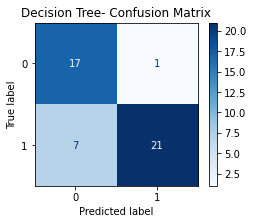

In [40]:
confusion_matrix_plot(X_train, X_test, y_train, y_test, dtr, pred_dtr, 'Decision Tree')

In [41]:
accuracy_score(y_test,pred_dtr)

0.8260869565217391

In [42]:
print(classification_report(y_test,pred_dtr))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.95      0.75      0.84        28

    accuracy                           0.83        46
   macro avg       0.83      0.85      0.82        46
weighted avg       0.86      0.83      0.83        46



### Random Forest

In [43]:
rf = RandomForestClassifier(criterion='entropy')

In [44]:
%%time
model_train_rf = rf.fit(X_train,y_train)
print('Training Complete')

Training Complete
Wall time: 437 ms


In [45]:
pred_rf = model_train_rf.predict(X_test)

In [46]:
pred_rf

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

In [47]:
confusion_matrix(y_test,pred_rf)

array([[17,  1],
       [ 4, 24]], dtype=int64)

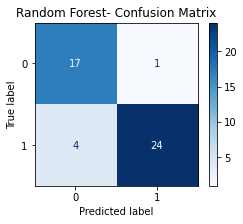

In [48]:
confusion_matrix_plot(X_train, X_test, y_train, y_test, rf, pred_rf, 'Random Forest')

In [49]:
accuracy_score(y_test,pred_rf)

0.8913043478260869

In [50]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.96      0.86      0.91        28

    accuracy                           0.89        46
   macro avg       0.88      0.90      0.89        46
weighted avg       0.90      0.89      0.89        46



### KNN

In [51]:
knn = KNeighborsClassifier()

In [52]:
model_train_knn = knn.fit(X_train, y_train)

In [53]:
pred_knn = model_train_knn.predict(X_test)

In [54]:
pred_knn

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [55]:
confusion_matrix(y_test,pred_knn)

array([[13,  5],
       [ 6, 22]], dtype=int64)

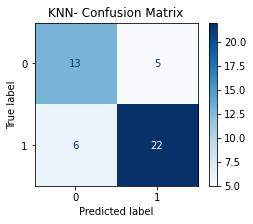

In [56]:
confusion_matrix_plot(X_train, X_test, y_train, y_test, knn, pred_knn, 'KNN')

In [57]:
accuracy_score(y_test,pred_knn)

0.7608695652173914

In [58]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.81      0.79      0.80        28

    accuracy                           0.76        46
   macro avg       0.75      0.75      0.75        46
weighted avg       0.76      0.76      0.76        46



### Logistic Regression

In [59]:
lgr = LogisticRegression()

In [60]:
model_train_lgr = lgr.fit(X_train,y_train)

C:\Users\amant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
pred_lgr = model_train_lgr.predict(X_test)

In [62]:
confusion_matrix(y_test, pred_lgr)

array([[16,  2],
       [ 3, 25]], dtype=int64)

In [63]:
accuracy_score(y_test,pred_lgr)

0.8913043478260869

In [64]:
print(classification_report(y_test,pred_lgr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.93      0.89      0.91        28

    accuracy                           0.89        46
   macro avg       0.88      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



### Naive Bayes

In [65]:
nb = MultinomialNB()

In [66]:
model_train_nb = nb.fit(X_train,y_train)

In [67]:
pred_nb = model_train_nb.predict(X_test)
pred_nb

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0], dtype=int64)

In [68]:
confusion_matrix(y_test,pred_nb)

array([[16,  2],
       [ 4, 24]], dtype=int64)

In [69]:
accuracy_score(y_test,pred_nb)

0.8695652173913043

In [70]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.92      0.86      0.89        28

    accuracy                           0.87        46
   macro avg       0.86      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



<AxesSubplot:>

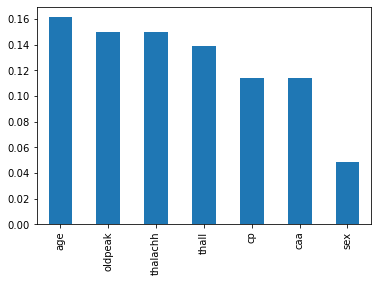

In [79]:
feat_imp = pd.Series(model_train_rf.feature_importances_, index = X_train.columns)
feat_imp.nlargest(7).plot(kind = 'bar')

<AxesSubplot:>

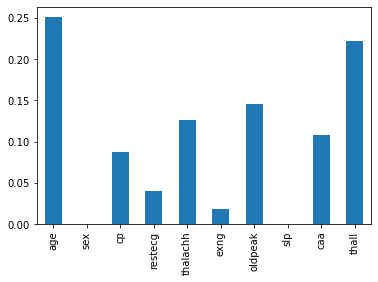

In [81]:
feat_imp = pd.Series(model_train_dtr.feature_importances_, index = X_train.columns)
feat_imp.plot(kind = 'bar')

In [76]:
print(accuracy_score(y_test,pred_dtr)) # Deision tree model Accuracy
print(accuracy_score(y_test,pred_knn)) # KNN model Accuracy
print(accuracy_score(y_test,pred_lgr)) # Logistic regression model accuray
print(accuracy_score(y_test,pred_nb)) # Naive Bayes model accuracy
print(accuracy_score(y_test,pred_rf))  #Random Forest model Accuracy

0.8260869565217391
0.7608695652173914
0.8913043478260869
0.8695652173913043
0.8913043478260869


#### Logistic regression model and Random Forest model gives the Maximum Possible Accuracy